In [1]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np


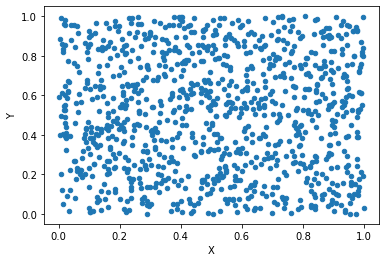

In [2]:
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy.X = X
df_xy.Y = Y
df_xy.plot(x="X",y = "Y",kind="scatter")

In [3]:

X = np.random.uniform(0,1,1000)
X

array([6.31003734e-02, 4.86871145e-01, 5.43120930e-01, 5.86481919e-01,
       4.60887230e-01, 3.54389229e-01, 7.39891043e-01, 6.80700969e-01,
       8.72889732e-01, 5.64219572e-01, 1.79505837e-01, 3.46634237e-01,
       6.01692506e-01, 2.29948727e-01, 1.43398673e-01, 7.97284745e-01,
       4.76273559e-01, 8.25110517e-02, 2.29416510e-01, 2.51602488e-01,
       4.79579517e-01, 2.50246096e-01, 3.06411867e-01, 9.28410187e-01,
       3.65796140e-01, 3.34159133e-01, 1.08013782e-01, 7.50927310e-01,
       4.90921482e-01, 3.93233798e-01, 4.97226330e-01, 3.98799025e-01,
       4.67094550e-01, 1.84532587e-02, 3.27843684e-01, 1.78724978e-01,
       3.47706649e-01, 7.44778182e-01, 8.03212525e-01, 9.72371679e-01,
       7.74208382e-01, 9.43616369e-01, 6.60177496e-01, 4.48779083e-01,
       2.36767147e-02, 4.76855799e-01, 1.38114811e-02, 6.64576804e-01,
       3.28025875e-02, 2.31803183e-01, 4.80120385e-01, 4.23438709e-02,
       9.47220357e-01, 7.52093911e-01, 9.75433362e-02, 3.38398786e-01,
      

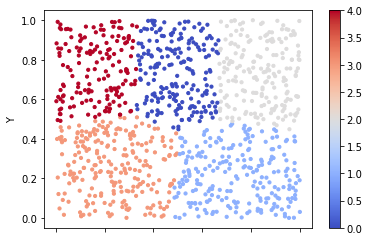

In [4]:
model1 = KMeans(n_clusters=5).fit(df_xy)

df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",s=10,cmap=plt.cm.coolwarm)


In [5]:
Univ = pd.read_csv("../input/uni478/Universities (1).csv")

In [6]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(Univ.iloc[:,1:])


df_norm.head(10)  # Top 10 rows


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


In [7]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=5) 
model.fit(df_norm)

model.labels_ # getting the labels of clusters assigned to each row 

array([1, 3, 0, 4, 4, 1, 1, 4, 1, 3, 1, 4, 4, 2, 1, 2, 1, 2, 4, 4, 0, 4,
       4, 2, 1], dtype=int32)

In [8]:
md=pd.Series(model.labels_)  # converting numpy array into pandas series object 
Univ['clust']=md # creating a  new column and assigning it to new column 
df_norm.head()


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667


In [9]:
Univ.iloc[:,1:7].groupby(Univ.clust).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clust,,,,,,
0,1220.000000,63.500000,63.500000,12.500000,20248.000000,78.500000
1,1356.875000,91.125000,21.500000,10.875000,33878.750000,94.500000
2,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
3,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000
4,1266.666667,80.666667,36.888889,12.888889,23455.111111,88.888889


In [10]:
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust
0,Brown,1310,89,22,13,22704,94,1
1,CalTech,1415,100,25,6,63575,81,3
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,4
4,Cornell,1280,83,33,13,21864,90,4
